In [1]:
import pandas as pd
import numpy as np
import math
from random import random
import matplotlib.pyplot as plt

import keras as ks
from keras.models import Model
from keras.layers import Input, Dense
%matplotlib inline

Using TensorFlow backend.


## Load the data

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
encoding_dim = 2

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [24]:
input_img = Input(shape=(784,)) #x
# encoded = Dense(128, activation='relu')(input_img) #h # 1
encoded = Dense(64, activation='relu')(input_img) #2
# encoded = Dense(32, activation='relu')(encoded) #3
encoded = Dense(8, activation='relu')(encoded) #4
encoded = Dense(2, activation='relu')(encoded) #5

input_decoder = Input(shape=(2,))

decoded = Dense(8, activation='relu')(encoded)
# decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(64, activation='relu')(decoded)
# decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='relu')(decoded)

In [25]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

decoder = autoencoder.get_layer(index=4)(input_decoder)
decoder = autoencoder.get_layer(index=5)(decoder)
decoder = autoencoder.get_layer(index=6)(decoder)
# decoder = autoencoder.get_layer(index=7)(decoder)
# decoder = autoencoder.get_layer(index=10)(decoder)

decodermodel = Model(input_decoder, decoder)
decodermodel.compile(optimizer='adadelta', loss='binary_crossentropy')

## Deep encoder

In [26]:
nums = [0,1,9]
# nums = [0,1,2,3,4,5,6,7,8,9]
x_filter = x_train[np.isin(y_train, nums)]
x_filter.shape
y_filter = y_train[np.isin(y_train, nums)]

In [27]:

autoencoder.fit(x_filter, x_filter,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 18614 samples, validate on 10000 samples
Epoch 1/200
18614/18614 [==============================] - 1s 69us/step - loss: 0.9245 - val_loss: 0.9976
Epoch 2/200
18614/18614 [==============================] - 1s 39us/step - loss: 0.8968 - val_loss: 0.9945
Epoch 3/200
18614/18614 [==============================] - 1s 41us/step - loss: 0.8951 - val_loss: 0.9941
Epoch 4/200
18614/18614 [==============================] - 1s 43us/step - loss: 0.8939 - val_loss: 0.9928
Epoch 5/200
18614/18614 [==============================] - 1s 44us/step - loss: 0.8914 - val_loss: 0.9849
Epoch 6/200
18614/18614 [==============================] - 1s 45us/step - loss: 0.8807 - val_loss: 0.9764
Epoch 7/200
18614/18614 [==============================] - 1s 41us/step - loss: 0.8540 - val_loss: 0.9563
Epoch 8/200
18614/18614 [==============================] - 1s 40us/step - loss: 0.8453 - val_loss: 0.9540
Epoch 9/200
18614/18614 [==============================] - 1s 39us/step - loss: 0.8366 - val_loss: 0.9

18614/18614 [==============================] - 1s 40us/step - loss: 0.6060 - val_loss: 0.7082
Epoch 78/200
18614/18614 [==============================] - 1s 39us/step - loss: 0.6058 - val_loss: 0.7070
Epoch 79/200
18614/18614 [==============================] - 1s 38us/step - loss: 0.6056 - val_loss: 0.7103
Epoch 80/200
18614/18614 [==============================] - 1s 40us/step - loss: 0.6039 - val_loss: 0.6984
Epoch 81/200
18614/18614 [==============================] - 1s 39us/step - loss: 0.5961 - val_loss: 0.6963
Epoch 82/200
18614/18614 [==============================] - 1s 39us/step - loss: 0.5914 - val_loss: 0.6953
Epoch 83/200
18614/18614 [==============================] - 1s 40us/step - loss: 0.5723 - val_loss: 0.6720
Epoch 84/200
18614/18614 [==============================] - 1s 39us/step - loss: 0.5642 - val_loss: 0.6649
Epoch 85/200
18614/18614 [==============================] - 1s 40us/step - loss: 0.5551 - val_loss: 0.6555
Epoch 86/200
18614/18614 [========================

18614/18614 [==============================] - 1s 38us/step - loss: 0.4719 - val_loss: 0.5851
Epoch 154/200
18614/18614 [==============================] - 1s 39us/step - loss: 0.4723 - val_loss: 0.5844
Epoch 155/200
18614/18614 [==============================] - 1s 37us/step - loss: 0.4717 - val_loss: 0.5858
Epoch 156/200
18614/18614 [==============================] - 1s 38us/step - loss: 0.4718 - val_loss: 0.5826
Epoch 157/200
18614/18614 [==============================] - 1s 41us/step - loss: 0.4718 - val_loss: 0.5793
Epoch 158/200
18614/18614 [==============================] - 1s 40us/step - loss: 0.4720 - val_loss: 0.5828
Epoch 159/200
18614/18614 [==============================] - 1s 40us/step - loss: 0.4717 - val_loss: 0.5910
Epoch 160/200
18614/18614 [==============================] - 1s 38us/step - loss: 0.4714 - val_loss: 0.5879
Epoch 161/200
18614/18614 [==============================] - 1s 38us/step - loss: 0.4714 - val_loss: 0.5877
Epoch 162/200
18614/18614 [===============

In [28]:
encoder = Model(input_img, encoded)

In [29]:
x_test_encoded = encoder.predict(x_filter, batch_size=256)

In [30]:
np.min(x_test_encoded,0)

array([ 0.,  0.], dtype=float32)

In [32]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

Xx = (np.min(x_test_encoded,0)[0],np.max(x_test_encoded,0)[0])
Yy = (np.min(x_test_encoded,0)[1],np.max(x_test_encoded,0)[1])

def f(x,y):
    plt.figure(2, figsize=(20,8))
    plt.subplot(121)
    plt.scatter(*x_test_encoded.T, c=y_filter,cmap=plt.cm.Set2)
    plt.colorbar()
    plt.scatter(x,y, c='r')
    
    plt.subplot(122)
    x_pred = decodermodel.predict(np.array([[x,y]]))
    plt.imshow(x_pred.reshape((28,28)))
    plt.show()

interactive_plot = interactive(f, x=Xx, y=Yy)
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

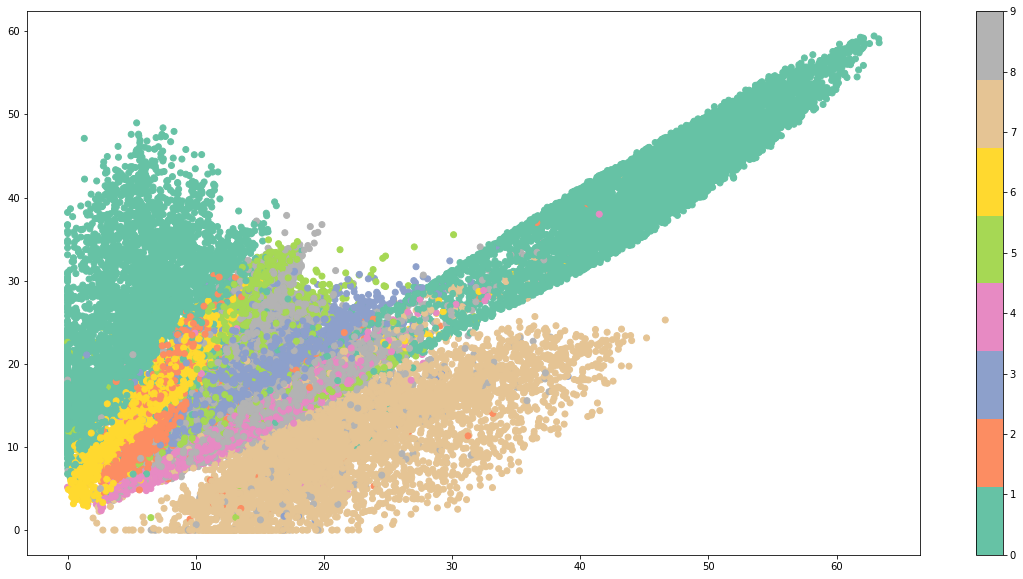

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(*x_test_encoded.T, c=y_filter,cmap=plt.cm.Set2)
plt.colorbar()
plt.show()

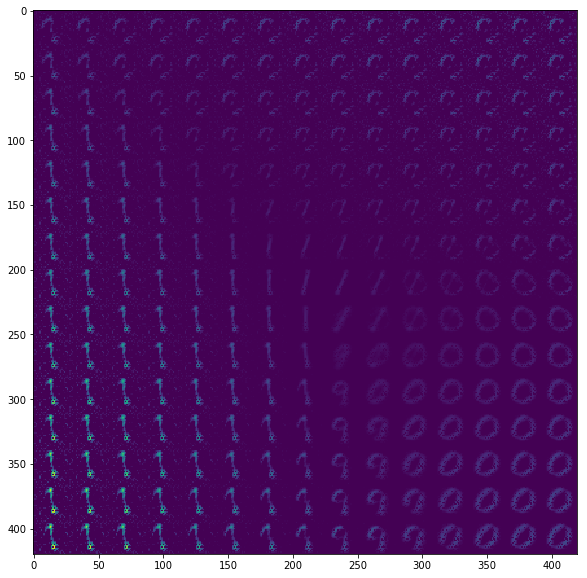

In [33]:
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]]) #* epsilon_std
        x_decoded = decodermodel.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

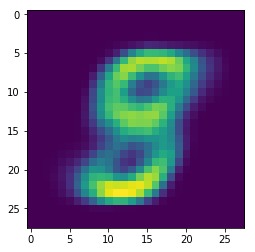

In [21]:
plt.imshow(decodermodel.predict(np.array([x_test_encoded[0]])).reshape(28,28))

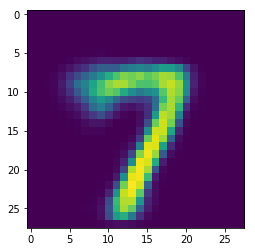

In [22]:
x_pred = autoencoder.predict(x_test)
plt.imshow(x_pred[0].reshape(28,28))